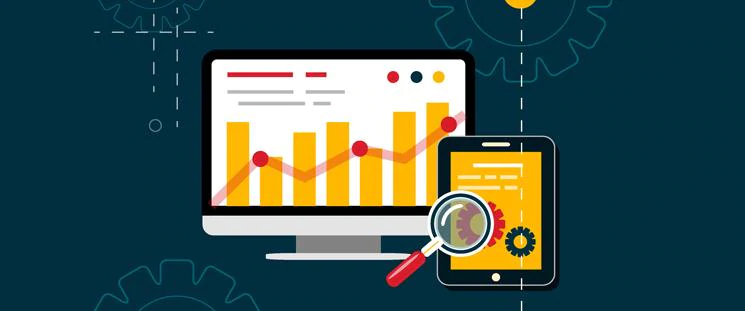

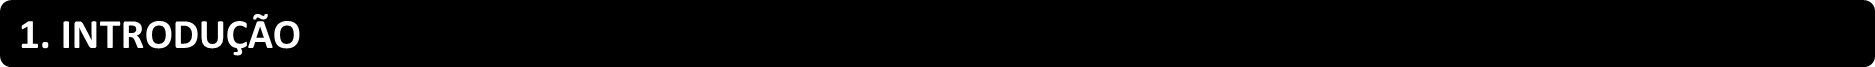

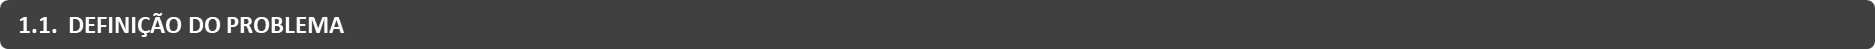

Uma empresa internacional de comércio eletrônico (E-commerce) que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.

Os produtos ficam armazendaos em um armazém na sede da empresa. Após concluir a compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do mundo. Os produtos são enviados de navio, avião ou caminhão, dependendo da região da entrega.

Em cada compra o cliente pode receber um desconto dependendo do peso do produto comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de compra. O único dado pessoal sobre o cliente que está disponível é o gênero.

Nosso trabalho é explorar os dados, compreender como estão organizados, detectar eventuais problemas e analisar os dados por diferentes perspectivas.

Trabalharemos com dados fictícios que representam dados reais de uma empresa de E-commerce.

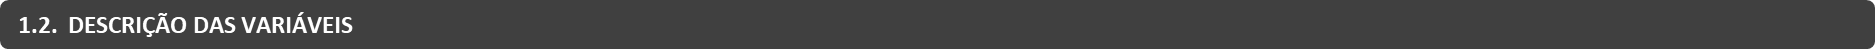

|           **Nome**          | **Tipo de Dado** |                           **Descrição**                          |
|:---------------------------:|:---------------:|:----------------------------------------------------------------:|
|            **ID**           |      *Int*     |                  ID exclusivo de cada transação.                 |
|     **corredor_armazem**    | *Character(1)* |   Letra do corredor do armazém onde o produto está armazenado.   |
|        **modo_envio**       |    *String*    |                     Modo de envio do produto.                    |
| **numero_chamadas_cliente** |      *Int*     |    Número de vezes que o cliente acionou o suporte da empresa.   |
|    **avaliacao_cliente**    |      *Int*     |        Avaliação do cliente sobre a experiência de compra.       |
|      **custo_produto**      |      *Int*     |                         Custo do produto.                        |
|    **compras_anteriores**   |      *Int*     |     Número de vezes que o cliente fez uma compra na empresa.     |
|    **prioridade_produto**   |    *String*    |                 Prioridade de entrega do produto.                |
|          **genero**         | *Character(1)* |                    Gênero do cliente (F ou M).                   |
|         **desconto**        |      *Int*     |             Desconto concedido na compra do produto.             |
|       **peso_gramas**       |      *Int*     |                         Peso do produto.                         |
|    **entregue_no_prazo**    | *Character(1)* | 0 - Produto Não Entregue no Prazo; 1 - Produto Entregue no Prazo |

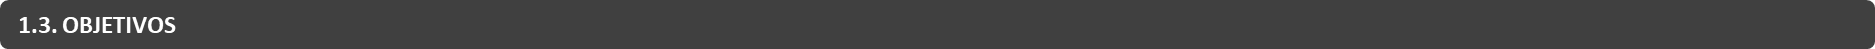

Responder as seguintes questões:

**1. Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?**

**2. Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?**

**3. Quais são os corredores que armazenam produtos com a maior proporção de entregas em atraso?**

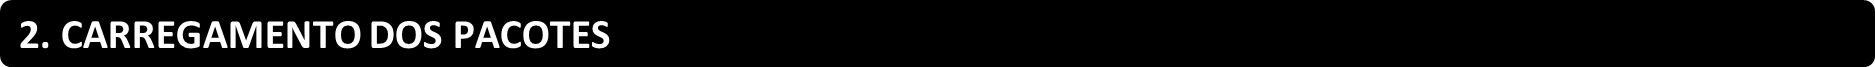

In [19]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Parâmetros de configuração dos gráficos
from matplotlib import rcParams
rcParams['figure.figsize'] = 30, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

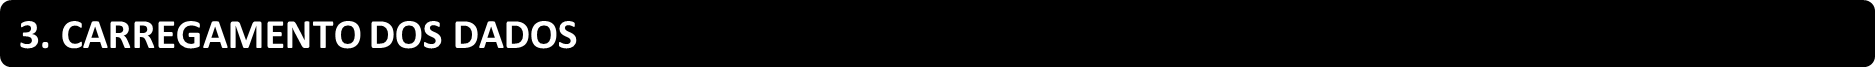

In [2]:
df = pd.read_csv('dados/dataset.csv')

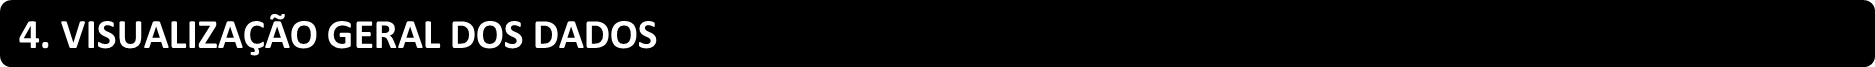

In [3]:
lins, cols = df.shape[0], df.shape[1]
print(f'O Dataset possui \033[1m{lins} linhas\033[0m e \033[1m{cols} colunas\033[0m.')

O Dataset possui 11000 linhas e 12 colunas.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.sample(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
5809,5810,F,Navio,5,1,179,3,baixa,F,7,5814,0
8410,8411,C,Navio,3,3,241,2,alta,M,2,4836,1
7839,7840,B,Navio,3,4,273,2,media,F,5,5223,0


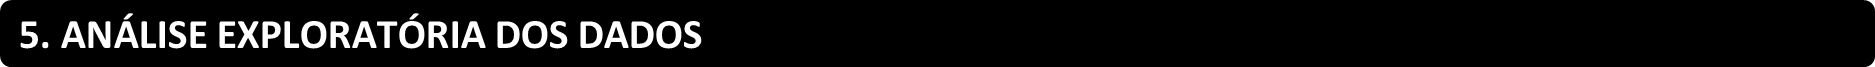

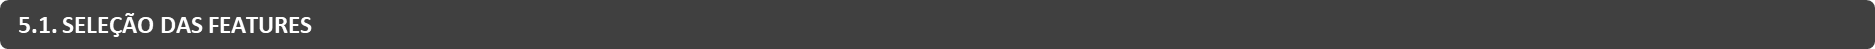

In [6]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [7]:
dfCat = df.select_dtypes(include='O')
dfNum = df.select_dtypes(exclude='O')
dfNum.drop(['ID', 'entregue_no_prazo'], axis=1, inplace=True)
target = pd.DataFrame(df.entregue_no_prazo)

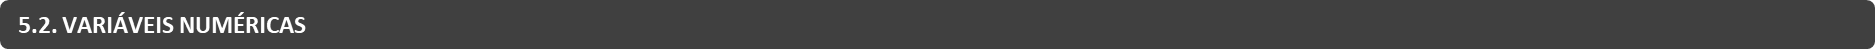

In [8]:
dfNum.describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


***
**Observações Iniciais:**
* Provavelmente não há valores ausentes na base de dados;
* As colunas *numero_chamadas_cliente*, *avaliacao_cliente* e *custo_produto* parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes);
* As colunas *compras_anteriores* e *desconto* parecem estar inclinadas para a direita (média > mediana); e
* A coluna *peso_gramas* parece estar mais inclinada para a esquerda (média < mediana).



***

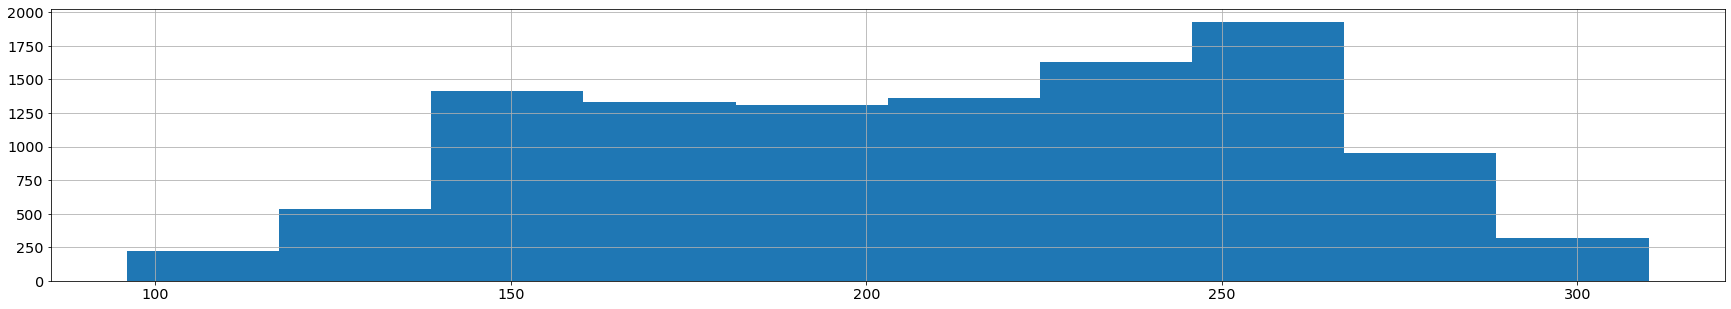

In [25]:
df.custo_produto.hist();

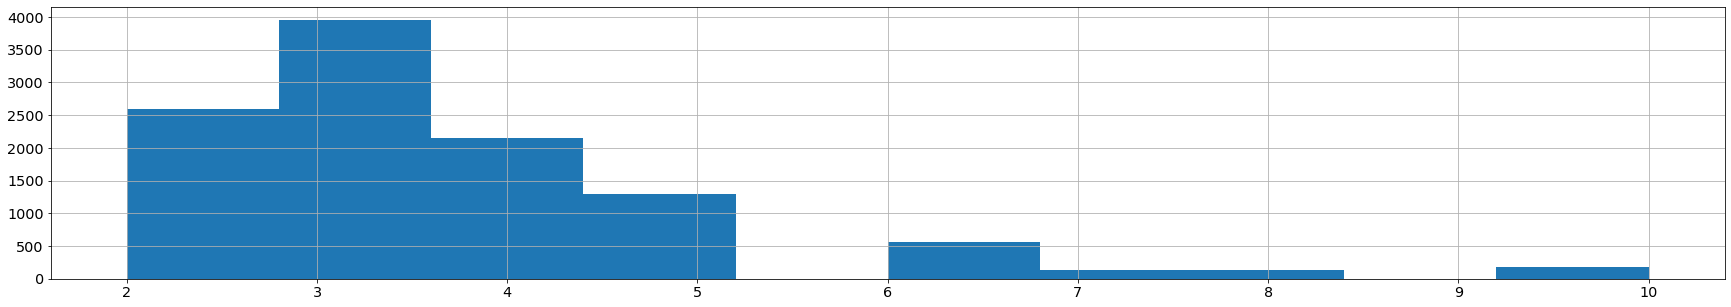

In [26]:
df.compras_anteriores.hist();

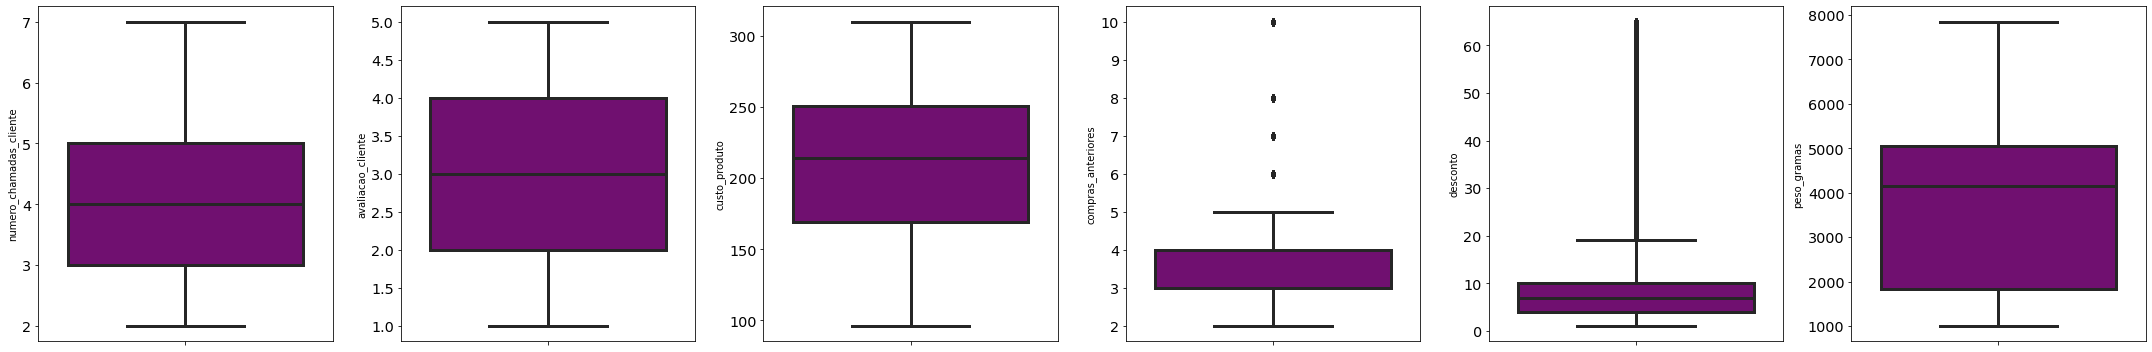

In [20]:
features = dfNum.columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='purple', orient='v')
    plt.tight_layout()

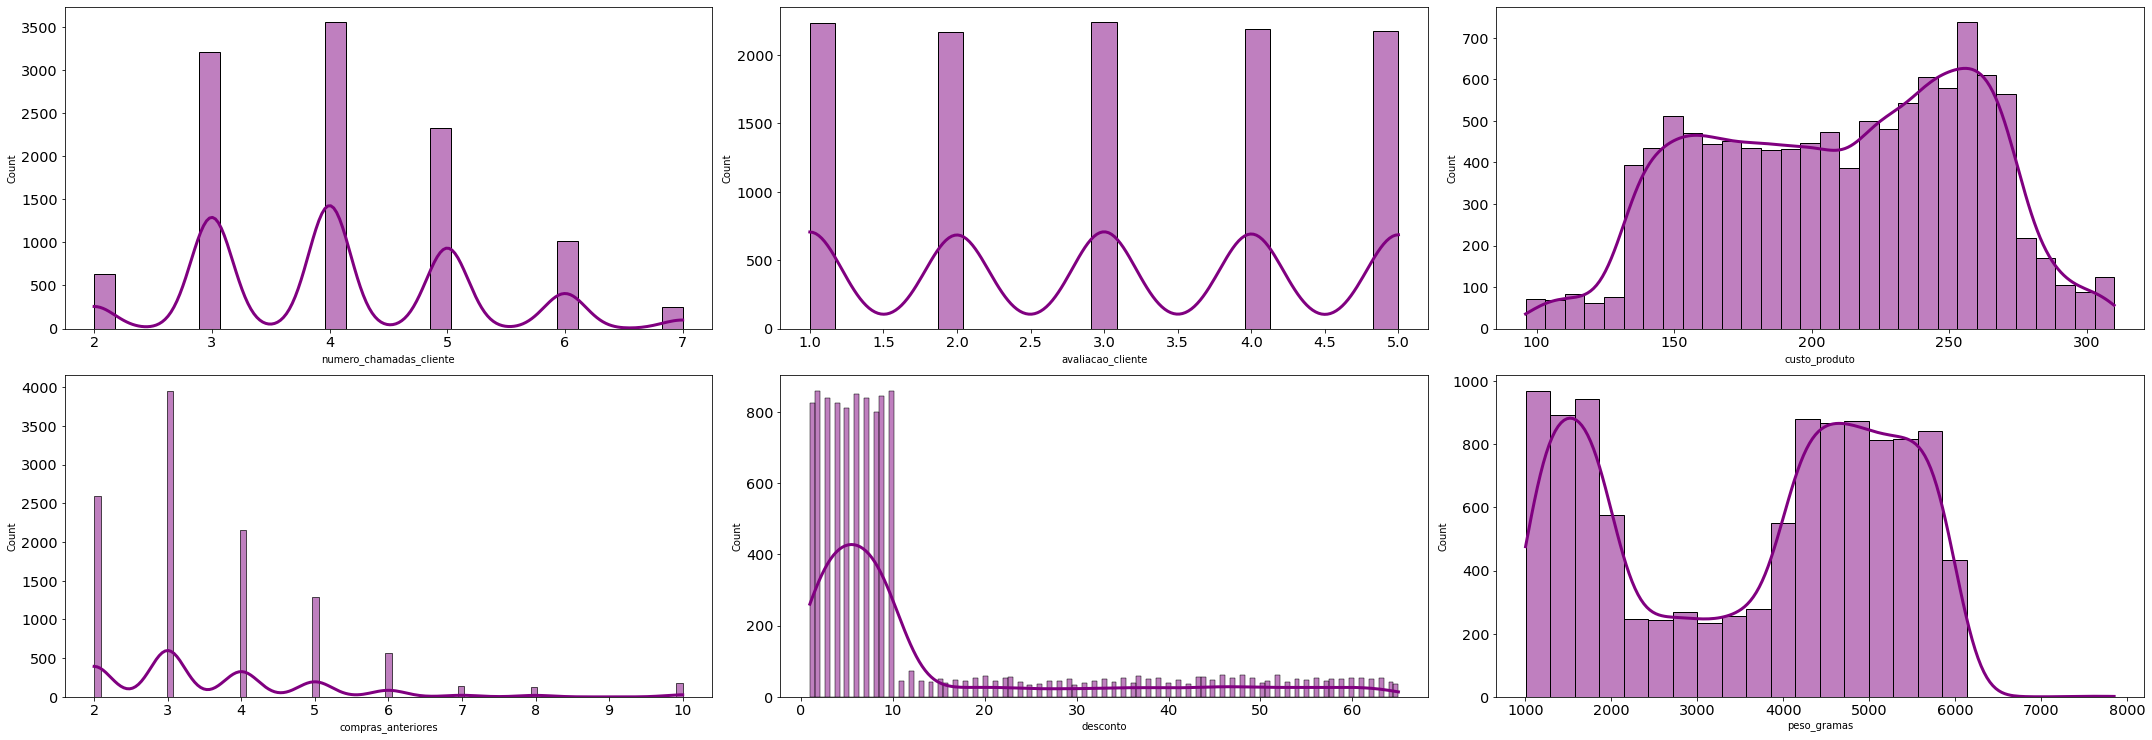

In [29]:
features = dfNum.columns
plt.figure(figsize=(30, 15))
for i in range(0, len(features)):
    plt.subplot(3, len(features) / 2, i + 1)
    sns.histplot(x=df[features[i]], kde=True, color='purple')
    plt.tight_layout()

***
A partir dos gráficos, podemos observar que:

* A coluna *custo_produto* parece estar próxima de uma **distribuição normal**;
* A coluna *peso_gramas* há incerteza de distribuição, assumindo o formato em **'U'**; e
* As colunas *numero_chamadas_cliente* e *avaliacao_cliente* estão distribuídas uniformemente.
***

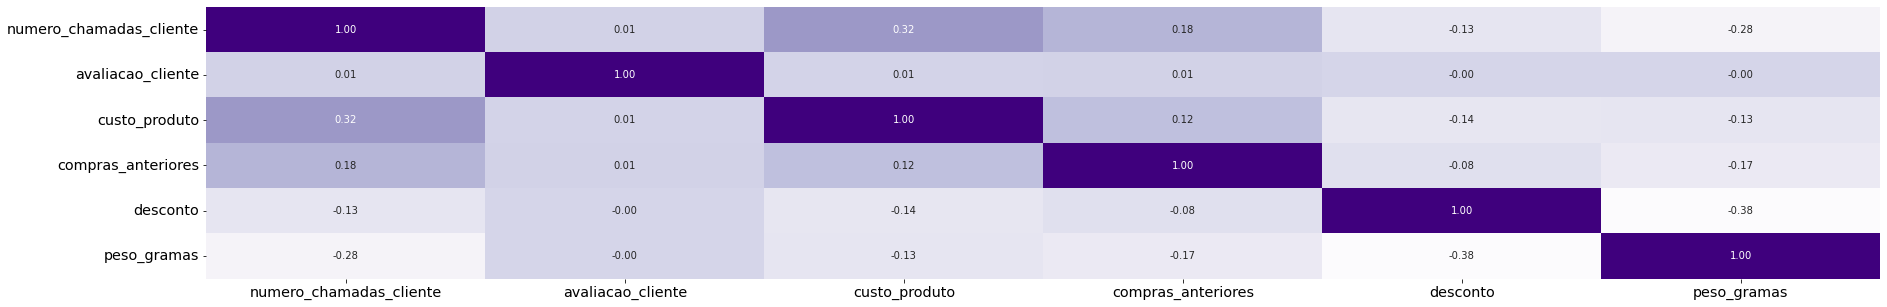

In [21]:
sns.heatmap(dfNum.corr(), cmap = 'Purples', annot = True, fmt = '.2f', cbar=False);

***
A partir do mapa de correlação, observa-se que:
* Há uma correlação positiva entre *numero_chamada_cliente* e *custo_produto*;
* Há uma correlação positiva entre *numero_chamada_cliente* e *compras_anteriores*;
* Há uma correlação negativa entre *desconto* e *peso_gramas*; e
* Há uma correlação fraca entre as demais variáveis.
***

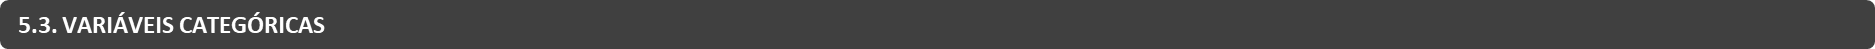

In [14]:
dfCat.describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


***
**Observações Iniciais:**
* Para a variável *corredor_armazem* **F** é a classe dominante;
* O modo de envio mais comum é por **Navio**, representando cerca de 68%;
* A demanda por produtos com **alta prioridade** é menor do que 10%;
* A distribuição do gênero do cliente, parece estar bem distribuída; e
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores**.
***

In [15]:
for col in dfCat.columns:
    print(f'Total de Registros por Categoria da Variável \033[46m{col}\033[0m:')
    print(dfCat[col].value_counts())
    print('-' * 60)

Total de Registros por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64
------------------------------------------------------------
Total de Registros por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64
------------------------------------------------------------
Total de Registros por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64
------------------------------------------------------------
Total de Registros por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64
------------------------------------------------------------


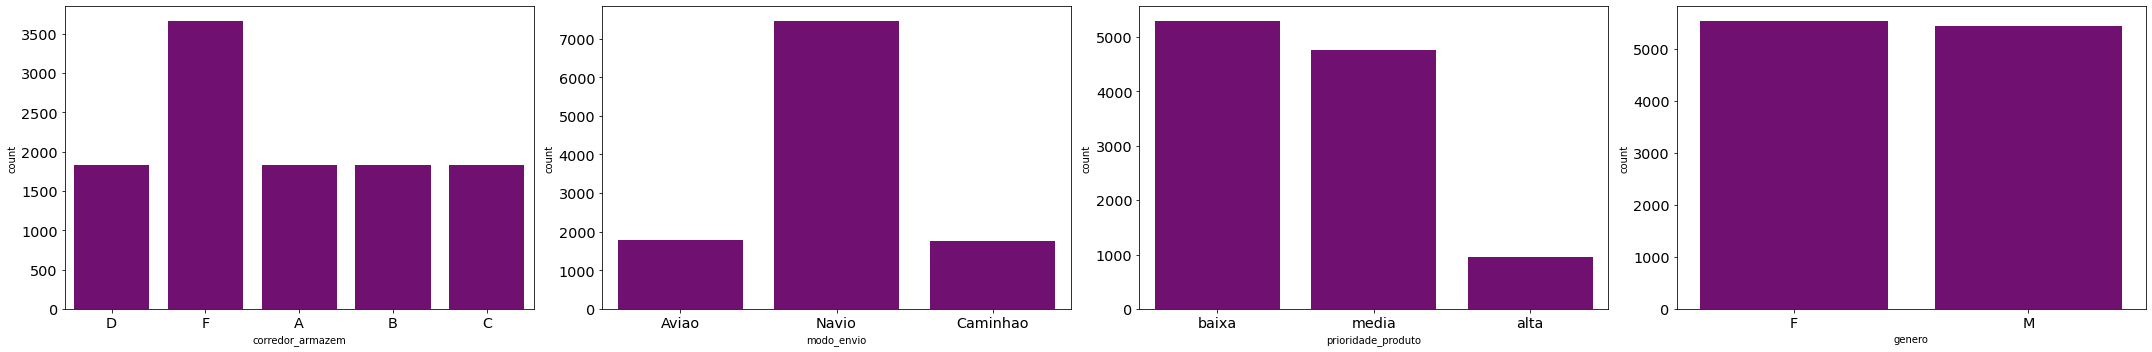

In [22]:
for i in range(0, len(dfCat.columns)):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=df[dfCat.columns[i]], color='purple', orient='v')
    plt.tight_layout()

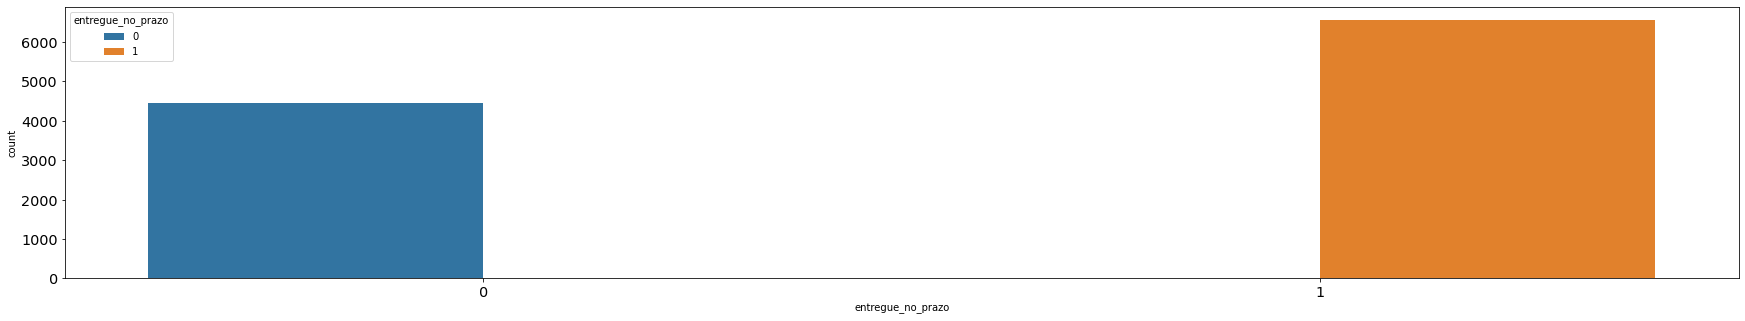

In [23]:
sns.countplot(data = df,
              x = df.entregue_no_prazo,
              hue = 'entregue_no_prazo');

***
A partir dos gráficos, podemos observar que:

* A maioria dos produtos enviados vieram do **corredor F**;
* O modo de envio através de **Navio** é o mais comum;
* Há poucos produtos com **prioridade de entrega alta**; e
* A proporção de clientes do **sexo Masculino** e do **sexo Feminino** é praticamente a mesma.
***

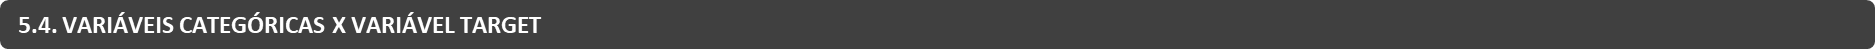

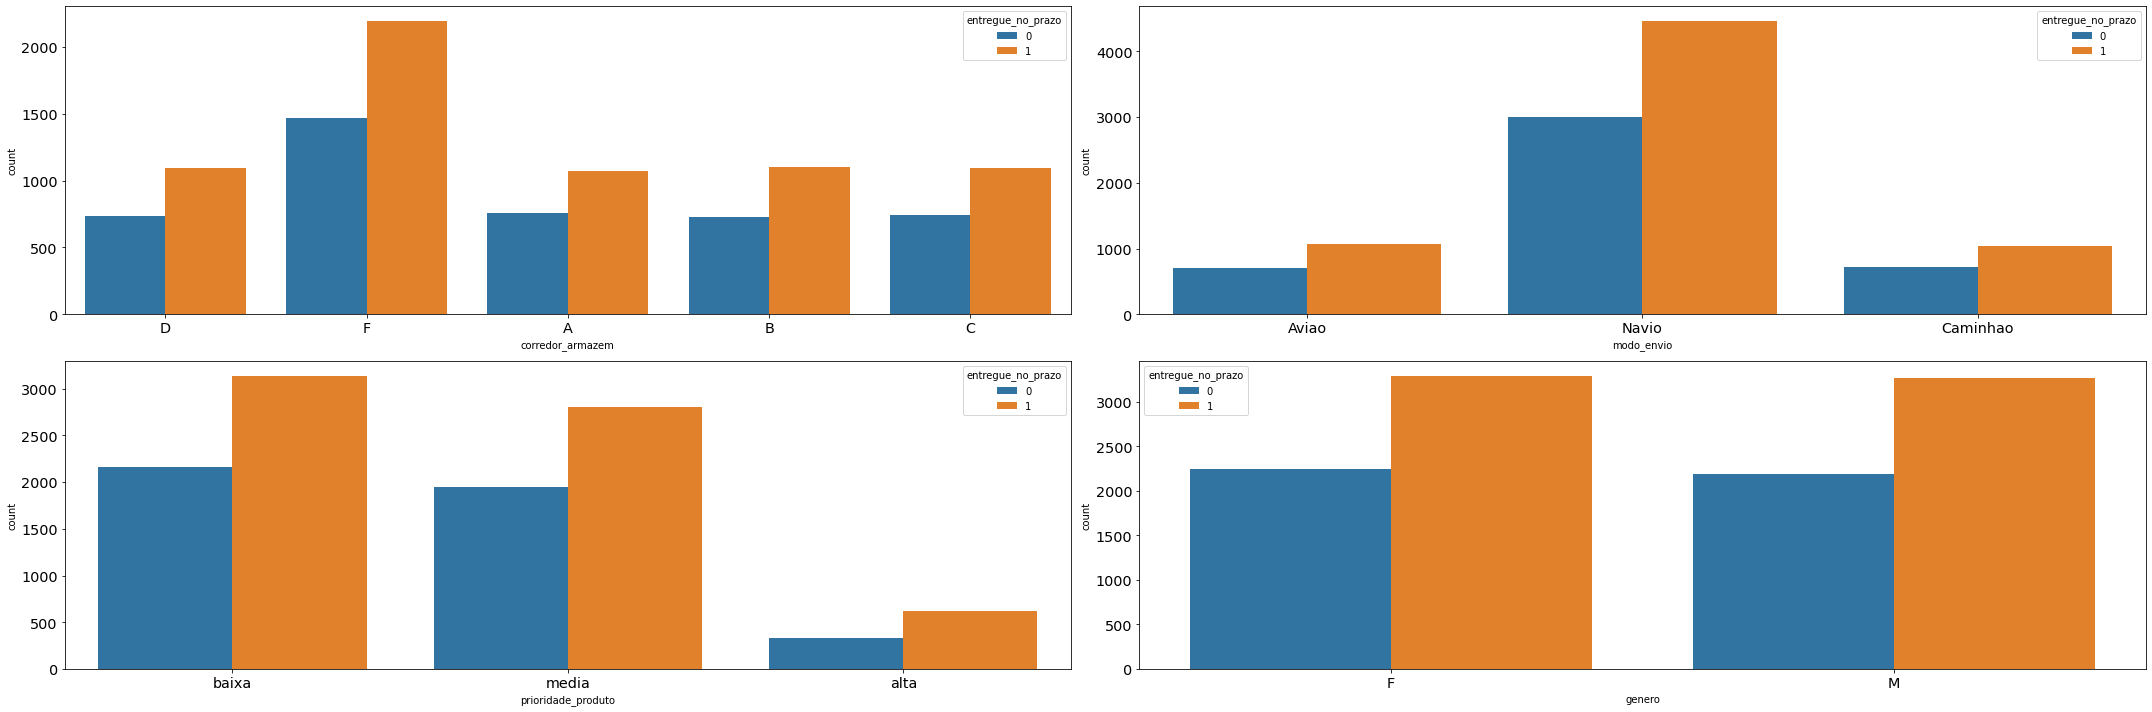

In [24]:
features = dfCat.columns
plt.figure(figsize = (30,10))
for i in range(0, len(features)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data = df, x = features[i], hue='entregue_no_prazo')
    plt.tight_layout()

***
* Envio por navio tende a apresentar atraso na entrega;
* Em *prioridade_produto* as categorias **baixa** e **média** tendem a apresentar atrasos na entrega;
* Em *corredor_armazem* produtos no **corredor F** tentem a apresentar atrados na entrega; e
* Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo.
***

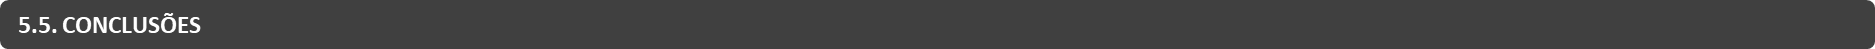

***
**Conclusões até o momento:**
* Os dados parecem válidos e não há defeitos maiores e/ou significativos;
* Existem algumas distribuições que são um pouco assimétricas;
* Não foi detectado problemas de multicolinearidade;
* Alguns recursos parecem completamente não correlacionados;
* Dos recursos categóricos, *modo_envio*, *corredor_armazem* e *importancia_produto* parecem úteis para prever a variável target.

***

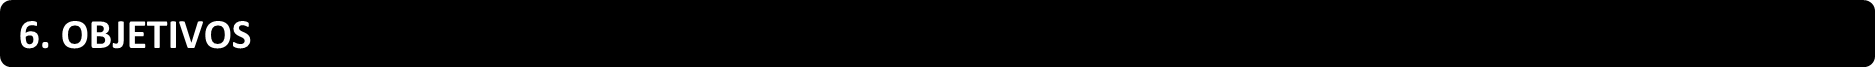

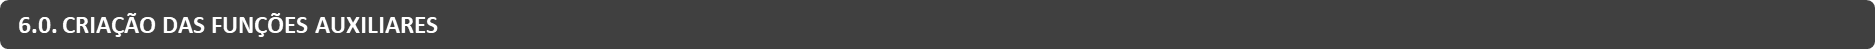

In [357]:
def gerarDataFrame(feature):
    dfTemp = df[[feature, 'entregue_no_prazo']].groupby(feature).sum().reset_index()
    atrasados = df[[feature, 'entregue_no_prazo']].groupby(feature).count().reset_index()
    dfTemp['Atrasados'] = atrasados['entregue_no_prazo'] - dfTemp['entregue_no_prazo']
    dfTemp.columns = ['Modo de Envio', 'Entregues no Prazo', 'Entregues Fora do Prazo']
    dfTemp['Total'] = dfTemp['Entregues no Prazo'] + dfTemp['Entregues Fora do Prazo']
    dfTemp['Porcentagem Prazo'] = dfTemp['Entregues no Prazo'] / (dfTemp['Entregues no Prazo'] + dfTemp['Entregues Fora do Prazo']) * 100
    dfTemp['Porcentagem Fora Prazo'] = 100 - dfTemp['Porcentagem Prazo']
    return dfTemp

In [363]:
def gerarEixos(df):
    totalEntregas = df.Total.to_numpy()
    totalEntregasForaPrazo = df['Entregues Fora do Prazo'].to_numpy()
    totalEntregasForaPrazoPercent = df['Porcentagem Fora Prazo'].to_numpy()
    totalEntregasPrazoPercent = df['Porcentagem Prazo'].to_numpy()
    labels = df['Modo de Envio'].to_numpy()
    listaDados = [labels, totalEntregas, totalEntregasForaPrazo, totalEntregasPrazoPercent, totalEntregasForaPrazoPercent]
    listaTitulos = ['Quantidade de Entregas x Entregas Atrasadas', 'Porcentagem de Entregas x Entregas Atrasadas']
    return listaDados, listaTitulos

In [443]:
def plotarGraficos(listaDados, listaTitulos):
    fig, (gra1, gra2) = plt.subplots(1, 2, figsize=(30, 6))
    gra1.bar(range(len(listaDados[0])), listaDados[1], alpha=0.6, color='g')
    gra1.bar(range(len(listaDados[0])), listaDados[2], alpha=0.6, color='r', bottom = listaDados[1])
    plt.sca(gra1), plt.xticks(range(len(listaDados[0])), listaDados[0], fontsize=12)
    plt.legend(['No Prazo', 'Atrasados'], borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', facecolor = 'gray', framealpha = 0.05,
               fontsize=12, loc=0, bbox_to_anchor=(0.2, 0.98))
    gra1.set_xlabel('')
    gra1.tick_params(axis='y', labelleft=False, left=None), gra1.tick_params(axis='x', labelsize=15)
    gra1.set_title(f'Gráfico 1. {listaTitulos[0]}', fontsize=15, pad=25)
    gra1.spines['bottom'].set_linewidth(1.5)

    gra2.bar(range(len(listaDados[0])), listaDados[3], alpha=0.6, color='g')
    gra2.bar(range(len(listaDados[0])), listaDados[4], alpha=0.6, color='r', bottom = listaDados[3])
    plt.sca(gra2), plt.xticks(range(len(listaDados[0])), listaDados[0], fontsize=12)
    gra2.set_xlabel('')
    gra2.tick_params(axis='y', labelleft=False, left=None), gra2.tick_params(axis='x', labelsize=15)
    gra2.set_title(f'Gráfico 2. {listaTitulos[1]}', fontsize=15, pad=25)
    gra2.spines['bottom'].set_linewidth(1.5)

    for l in range(len(listaDados[0])):
        gra1.annotate(listaDados[1][l], (l, 300), fontsize=15, ha='center')
        gra1.annotate(listaDados[2][l], (l, listaDados[2][l] + listaDados[1][l] + 100), fontsize=15, ha='center')
        gra2.annotate(f'{listaDados[4][l]:.2f}%', (l, 90), fontsize=15, ha='center')
        gra2.annotate(f'{listaDados[3][l]:.2f}%', (l, 5), fontsize=15, ha='center')    

    for axis in ['top', 'right', 'left']:    
        gra1.spines[axis].set_color(None)
        gra2.spines[axis].set_color(None)
    plt.show()

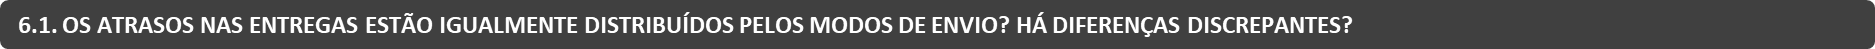

In [444]:
dfModoEnvio = gerarDataFrame('modo_envio')
dfModoEnvio

,Modo de Envio,Entregues no Prazo,Entregues Fora do Prazo,Total,Porcentagem Prazo,Porcentagem Fora Prazo
0,Aviao,1069,708,1777,60.157569,39.842431
1,Caminhao,1035,725,1760,58.806818,41.193182
2,Navio,4459,3004,7463,59.748091,40.251909


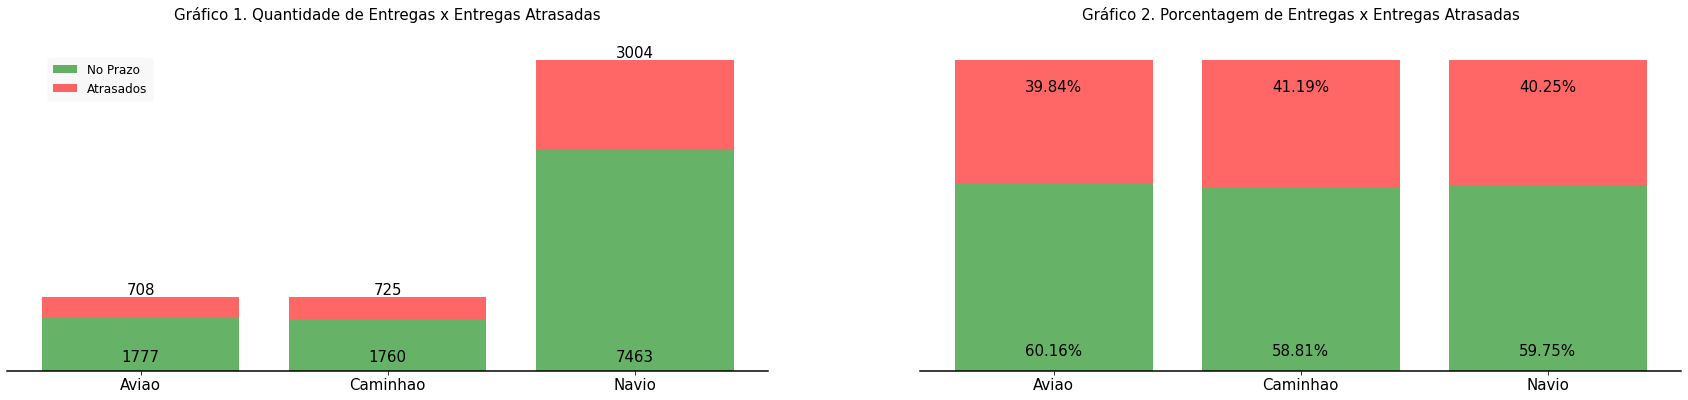

In [458]:
listaDados, listaTitulos = gerarEixos(dfModoEnvio)
plotarGraficos(listaDados, listaTitulos)

***
* Observando o Gráfico 1, com os números absolutos do total de entrega e de produtos atrasados podemos notar que em todos os modos de envio há atrasos;
* O Gráfico 2, deixa claro que todos os modos de envio apresentam uma proporção bastante semelhante de envios dentro do prazo e atrasados.
***

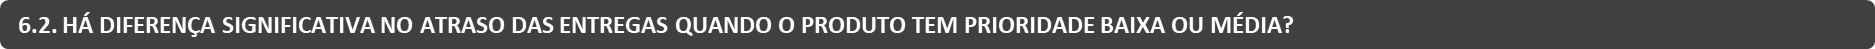

In [456]:
dfPrioridade = gerarDataFrame('prioridade_produto')
dfPrioridade

,Modo de Envio,Entregues no Prazo,Entregues Fora do Prazo,Total,Porcentagem Prazo,Porcentagem Fora Prazo
0,alta,616,332,948,64.978903,35.021097
1,baixa,3140,2158,5298,59.267648,40.732352
2,media,2807,1947,4754,59.045015,40.954985


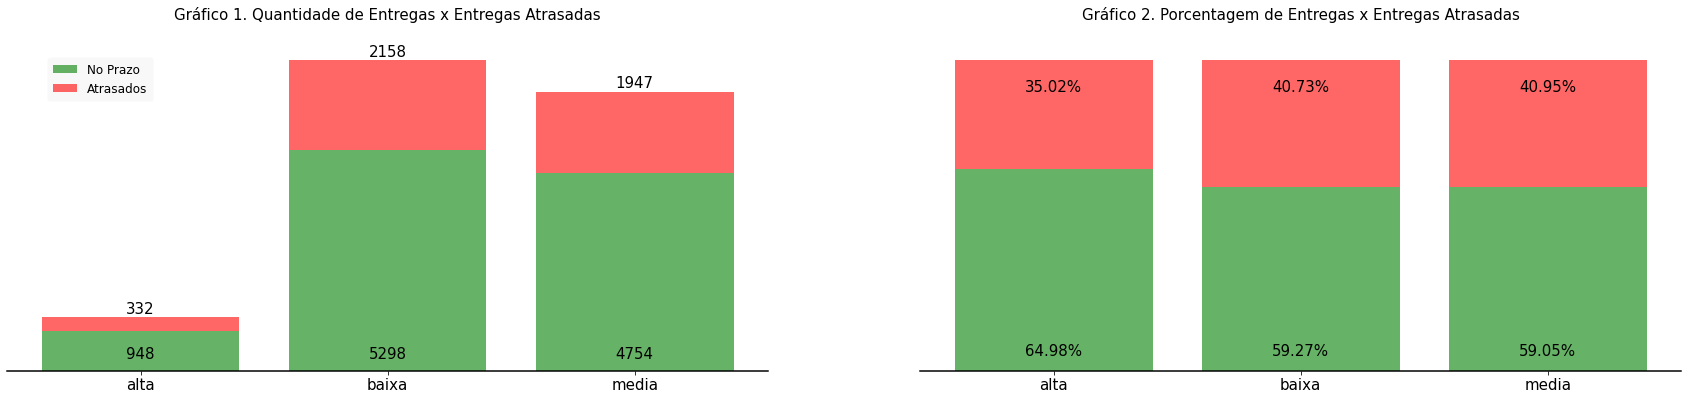

In [457]:
listaDados, listaTitulos = gerarEixos(dfPrioridade)
plotarGraficos(listaDados, listaTitulos)

***
* Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com média e baixa prioridade. Entregas no prazo tem proporção quase similar entre todas as categorias.
***

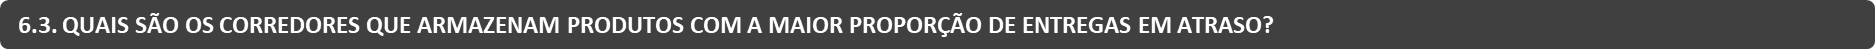

In [452]:
dfCorredor = gerarDataFrame('corredor_armazem')
dfCorredor

,Modo de Envio,Entregues no Prazo,Entregues Fora do Prazo,Total,Porcentagem Prazo,Porcentagem Fora Prazo
0,A,1075,758,1833,58.647027,41.352973
1,B,1104,729,1833,60.229133,39.770867
2,C,1094,740,1834,59.651036,40.348964
3,D,1096,738,1834,59.760087,40.239913
4,F,2194,1472,3666,59.847245,40.152755


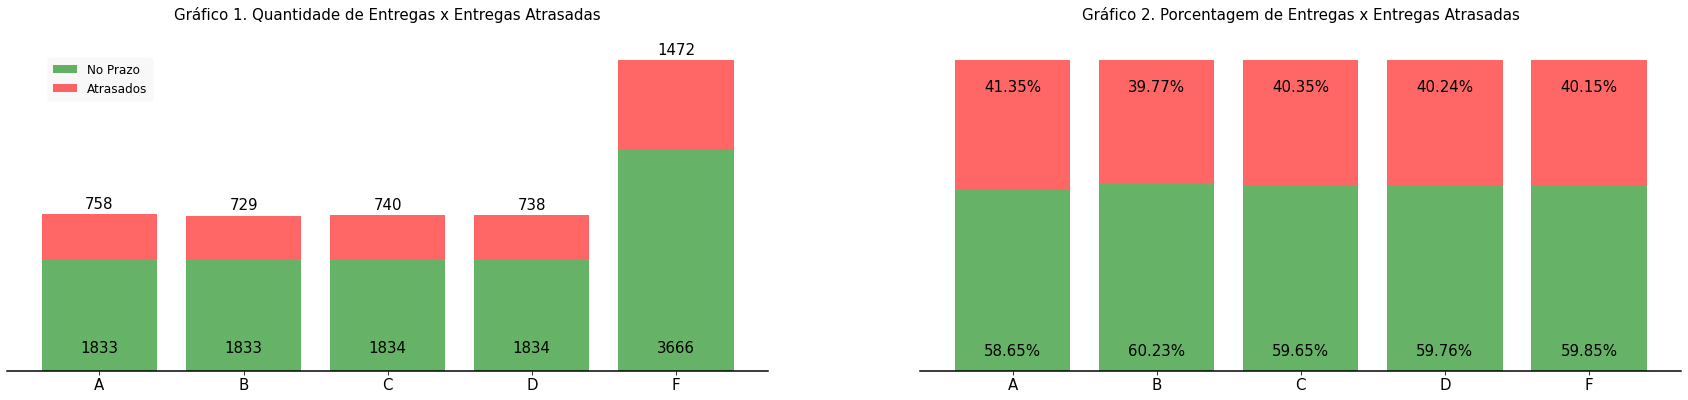

In [455]:
listaDados, listaTitulos = gerarEixos(dfCorredor)
plotarGraficos(listaDados, listaTitulos)

***
* A proporção de atrasos é similar para produtos de todos os corredores, produtos do **corredor A** são ligeiramente os que mais possuem atrasos na entrega.
***

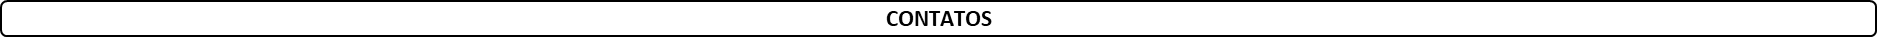

| **Github** 	| **Linkedin** 	| **Kaggle** 	| **Email** 	| **Site** 	|
|:---:	|:---:	|:---:	|:---:	|:---:	|
| [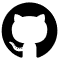](https://www.github.com/ThiagoFerreiraWD) 	| [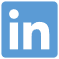](https://www.linkedin.com/in/tferreirasilva) 	| [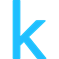](https://www.kaggle.com/thiagoferreirasilva) 	| [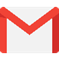](mailto:thiago.ferreirawd@gmail.com) 	| [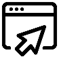](https://thiagoferreirads.com) 	|

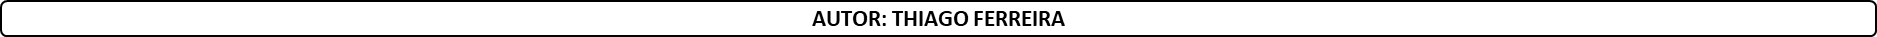